<a href="https://colab.research.google.com/github/magistery-tps/dm-cyt-tp2/blob/main/create_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://calmcode.io/pandas-pipe/end.html
* https://www.youtube.com/watch?v=g8nQ90Hk328&list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-&index=17

In [1]:
%matplotlib inline
%load_ext autoreload
%load_ext rich
%autoreload 2

In [2]:
from IPython.display import clear_output
import sys
import os.path
from os import path

def is_runing_into_colab_env():
    try:
        import google.colab
        return True
    except:
        return False

### 1. Instalacion de paquetes

Bajo paquete para trabajar con EEG- Me permite ver la topografía

In [3]:
if is_runing_into_colab_env(): 
    !pip install

###  2. Descargar dataset

Se descarga el dataset y lo descomprime en `~/dataset`.

In [4]:
filename     = "strength.SWOW-EN.R1.csv"
dataset_url  =  f'https://raw.githubusercontent.com/magistery-tps/dm-cyt-tp2/main/datasets/{filename}.zip'

if is_runing_into_colab_env():
    !cd ~
    !rm -rf datasets
    !rm -rf {filename}.zip
    !wget  {dataset_url}
    !unzip {filename}.zip
    !mkdir datasets
    !mv {filename} datasets
    !rm {filename}.zip

###  3. Importa libreria del proyecto

In [5]:
if is_runing_into_colab_env():
    if path.exists('/content/dm-cyt-tp2'):
        print('Pull...\n')
        !cd dm-cyt-tp2; git pull origin main
    else:
        print('Clone...\n')
        !git clone https://github.com/magistery-tps/dm-cyt-tp2.git

In [36]:
sys.path.append('/content/dm-cyt-tp2/src' if is_runing_into_colab_env() else '../src')

###  4. Importa paquetes externos

In [74]:
import numpy as np
import pandas as pd

import logging
from logger import setup_logger

from transform_step import  select_columns, \
                            rename_columns, \
                            filter_bidiredtional_associations, \
                            dropna

from output_step import plot_frequency, \
                        log_unique_words, \
                        log_source_into_response_and_vise_versa

https://smallworldofwords.org/en/project/research

In [75]:
setup_logger(format = '%(levelname)s: %(message)s')

###  5. Preprocesar dataset

In [76]:
def dataset(filename): return pd.read_csv(f'../datasets/{filename}', sep='\t')

INFO: (483636, 5) --> select_columns({}) --> (483636, 2)
INFO: (483636, 2) --> rename_columns({}) --> (483636, 2)
INFO: Unique - Source: 12217, Response: 64630
INFO: Unique: True, Source into response: 387323, Response into source: 482350
INFO: Unique: False, Source into response: 96313, Response into source: 1286
INFO: (483636, 2) --> filter_words_lt({'size_less_than': 2}) --> (482247, 2)
INFO: (482247, 2) --> dropna({}) --> (482200, 2)
INFO: (482200, 2) --> filter_bidiredtional_associations({}) --> (385335, 2)


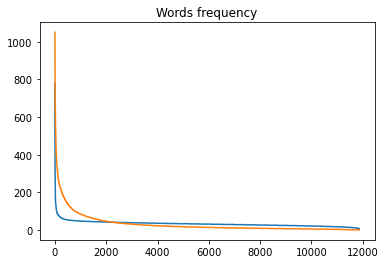

In [77]:
output = \
    dataset(filename) \
    .pipe(select_columns) \
    .pipe(rename_columns) \
    .pipe(log_unique_words) \
    .pipe(log_source_into_response_and_vise_versa, unique=True) \
    .pipe(log_source_into_response_and_vise_versa, unique=False) \
    .pipe(filter_words_lt, size_less_than=2) \
    .pipe(dropna) \
    .pipe(filter_bidiredtional_associations) \
    .pipe(plot_frequency, column = 'source') \
    .pipe(plot_frequency, column = 'response')